In [5]:
from mindquantum import *
import math
import numpy as np
import collections

In [118]:
N = 8
d = 50
alpha = 0.005
Beta_1 = 0.9
Beta_2 = 0.999
t_max = 100
n = 10 #should range from 1 to 1000

In [95]:
VariationalCircuit = Circuit()
#first layer
for i in range(0,N):
    VariationalCircuit += RY(math.pi/4).on(i)
for i in range(0,N):
    if (i % 2) == 1 and i < N-1:
        VariationalCircuit += X.on(i+1, i)
for i in range(0,N):
    if (i % 2) == 0 and i <N-1:
        VariationalCircuit += X.on(i+1, i)
#Blocks
for j in range(0,d//3):
    for i in range(0,N):
        VariableName = 'theta_'+str(j*3*N+i+1)
        VariationalCircuit += RX(VariableName).on(i)
    for i in range(0,N):
        if (i % 2) == 1 and i < N-1:
            VariationalCircuit += X.on(i+1, i)
    for i in range(0,N):
        if (i % 2) == 0 and i <N-1:
            VariationalCircuit += X.on(i+1, i)
    for i in range(0,N):
        VariableName = 'theta_'+str(j*3*N+N+i+1)
        VariationalCircuit += RY(VariableName).on(i)
    for i in range(0,N):
        if (i % 2) == 1 and i < N-1:
            VariationalCircuit += X.on(i+1, i)
    for i in range(0,N):
        if (i % 2) == 0 and i <N-1:
            VariationalCircuit += X.on(i+1, i)
    for i in range(0,N):
        VariableName = 'theta_'+str(j*3*N+N+N+i+1)
        VariationalCircuit += RZ(VariableName).on(i)
    for i in range(0,N):
        if (i % 2) == 1 and i < N-1:
            VariationalCircuit += X.on(i+1, i)
    for i in range(0,N):
        if (i % 2) == 0 and i <N-1:
            VariationalCircuit += X.on(i+1, i)
#the remaining layers
if (d % 3) == 1:
    for i in range(0,N):
        VariableName = 'theta_'+str((d//3)*3*N+i+1)
        VariationalCircuit += RX(VariableName).on(i)
    for i in range(0,N):
        if (i % 2) == 1 and i < N-1:
            VariationalCircuit += X.on(i+1, i)
    for i in range(0,N):
        if (i % 2) == 0 and i <N-1:
            VariationalCircuit += X.on(i+1, i)
if (d % 3) == 2:
    for i in range(0,N):
        VariableName = 'theta_'+str((d//3)*3*N+i+1)
        VariationalCircuit += RX(VariableName).on(i)
    for i in range(0,N):
        if (i % 2) == 1 and i < N-1:
            VariationalCircuit += X.on(i+1, i)
    for i in range(0,N):
        if (i % 2) == 0 and i <N-1:
            VariationalCircuit += X.on(i+1, i)
    for i in range(0,N):
        VariableName = 'theta_'+str((d//3)*3*N+N+i+1)
        VariationalCircuit += RY(VariableName).on(i)
    for i in range(0,N):
        if (i % 2) == 1 and i < N-1:
            VariationalCircuit += X.on(i+1, i)
    for i in range(0,N):
        if (i % 2) == 0 and i <N-1:
            VariationalCircuit += X.on(i+1, i)
VariationalCircuit

q0: ──RY(π/4)─────────●────RX(theta_1)─────────●────RY(theta_9)──────────●────RZ(theta_17)─────────●────RX(theta_25)─────────●────RY(theta_33)─────────●────RZ(theta_41)─────────●────RX(theta_49)─────────●────RY(theta_57)─────────●────RZ(theta_65)─────────●────RX(theta_73)─────────●────RY(theta_81)─────────●────RZ(theta_89)─────────●─────RX(theta_97)─────────●────RY(theta_105)─────────●────RZ(theta_113)─────────●────RX(theta_121)─────────●────RY(theta_129)─────────●────RZ(theta_137)─────────●────RX(theta_145)─────────●────RY(theta_153)─────────●────RZ(theta_161)─────────●────RX(theta_169)─────────●────RY(theta_177)─────────●────RZ(theta_185)─────────●────RX(theta_193)─────────●────RY(theta_201)─────────●────RZ(theta_209)─────────●────RX(theta_217)─────────●────RY(theta_225)─────────●────RZ(theta_233)─────────●────RX(theta_241)─────────●────RY(theta_249)─────────●────RZ(theta_257)─────────●────RX(theta_265)─────────●────RY(theta_273)─────────●────RZ(theta_281)─────────●────RX(theta_289)─────────●────RY(theta_297)─────────●────RZ(theta_305)─────────●────RX(theta_313)─────────●────RY(theta_321)─────────●────RZ(theta_329)─────────●────RX(theta_337)─────────●────RY(theta_345)─────────●────RZ(theta_353)─────────●────RX(theta_361)─────────●────RY(theta_369)─────────●────RZ(theta_377)─────────●────RX(theta_385)─────────●────RY(theta_393)─────────●──
                      │                        │                         │                         │                         │                         │                         │                         │                         │                         │                         │                         │                         │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │                          │
q1: ──RY(π/4)────●────X────RX(theta_2)────●────X────RY(theta_10)────●────X────RZ(theta_18)────●────X────RX(theta_26)────●────X────RY(theta_34)────●────X────RZ(theta_42)────●────X────RX(theta_50)────●────X────RY(theta_58)────●────X────RZ(theta_66)────●────X────RX(theta_74)────●────X────RY(theta_82)────●────X────RZ(theta_90)────●────X─────RX(theta_98)────●────X────RY(theta_106)────●────X────RZ(theta_114)────●────X────RX(theta_122)────●────X────RY(theta_130)────●────X────RZ(theta_138)────●────X────RX(theta_146)────●────X────RY(theta_154)────●────X────RZ(theta_162)────●────X────RX(theta_170)────●────X────RY(theta_178)────●────X────RZ(theta_186)────●────X────RX(theta_194)────●────X────RY(theta_202)────●────X────RZ(theta_210)────●────X────RX(theta_218)────●────X────RY(theta_226)────●────X────RZ(theta_234)────●────X────RX(theta_242)────●────X────RY(theta_250)────●────X────RZ(theta_258)────●────X────RX(theta_266)────●────X────RY(theta_274)────●────X────RZ(theta_282)────●────X────RX(theta_290)────●────X────RY(theta_298)────●────X────RZ(theta_306)────●────X────RX(theta_314)────●────X────RY(theta_322)────●────X────RZ(theta_330)────●────X────RX(theta_338)────●────X────RY(theta_346)────●────X────RZ(theta_354)────●────X────RX(theta_362)────●────X────RY(theta_370)────●──

In [112]:
# theta = np.ones(d*N)
# theta[1] -= 1 
# j = 6
# sim = Simulator('projectq', N)
# sim.reset()
# parameters = dict(zip(VariationalCircuit.params_name, theta))
# VariationalCircuit_Measure = VariationalCircuit + Measure().on(j) + Measure().on(j+1)
# res = sim.sampling(VariationalCircuit_Measure, parameters, shots=n, seed=41) #注意这个随机数种子
# print(res)
# expectation = (res.data['00'] + res.data['11'] - res.data['01'] - res.data['10'])/n
# print(expectation)
# # for key in res.data:
# #     print (key res.data[key])
# #sim.apply_circuit(VariationalCircuit,theta)
# #sim.apply_circuit(Circuit().measure(j).measure(j+1))
def expectation_ZZ(theta,j):
    sim = Simulator('projectq', N)
    sim.reset()
    parameters = dict(zip(VariationalCircuit.params_name, theta))
    VariationalCircuit_Measure = VariationalCircuit + Measure().on(j) + Measure().on(j+1)
    res = sim.sampling(VariationalCircuit_Measure, parameters, shots=n, seed=41)
    temp = 0
    for key in res.data:
        if (collections.Counter(key)['1'] % 2) == 0:
            temp += res.data[key]
        if (collections.Counter(key)['1'] % 2) == 1:
            temp -= res.data[key]
    expectation = temp/n
    # expectation = (res.data['00'] + res.data['11'] - res.data['01'] - res.data['10'])/n
    return expectation
def expectation_X(theta,j):
    sim = Simulator('projectq', N)
    sim.reset()
    parameters = dict(zip(VariationalCircuit.params_name, theta))
    VariationalCircuit_Measure = VariationalCircuit + H.on(j) + Measure().on(j)
    res = sim.sampling(VariationalCircuit_Measure, parameters, shots=n, seed=41)
    temp = 0
    for key in res.data:
        if (collections.Counter(key)['1'] % 2) == 0:
            temp += res.data[key]
        if (collections.Counter(key)['1'] % 2) == 1:
            temp -= res.data[key]
    expectation = temp/n
    # expectation = (res.data['0'] - res.data['1'])/n
    return expectation

In [97]:
# N = 8
ham = Hamiltonian(QubitOperator('Z0 Z1')+QubitOperator('Z1 Z2')+QubitOperator('Z2 Z3')+QubitOperator('Z3 Z4')+QubitOperator('Z4 Z5')+QubitOperator('Z5 Z6')+QubitOperator('Z6 Z7')+QubitOperator('X0')+QubitOperator('X1')+QubitOperator('X2')+QubitOperator('X3')+QubitOperator('X4')+QubitOperator('X5')+QubitOperator('X6')+QubitOperator('X7'))
#sim.get_expectation(ham) #直接get_expection, 原文中却是n次测量取平均得到的

In [98]:
def PartialDerivativeEstimator_1_infi(i,theta):
    sim = Simulator('projectq', N)
    e_i = np.zeros(d*N)
    e_i[i]+=1
    sim.reset()
    sim.apply_circuit(VariationalCircuit,theta+np.pi/2*e_i)
    a = sim.get_expectation(ham)
    #print(a)
    sim.reset()
    sim.apply_circuit(VariationalCircuit,theta-np.pi/2*e_i)
    b = sim.get_expectation(ham)
    PartialDerivative = 1/2*(a-b)
    #print(b)
    return PartialDerivative

In [99]:
def PartialDerivativeEstimator_1(i,theta):
    e_i = np.zeros(d*N)
    e_i[i]+=1
    temp = 0
    for j in range(0,N-1):
        temp += 1/2*(expectation_ZZ(theta+np.pi/2*e_i,j) - expectation_ZZ(theta-np.pi/2*e_i,j))
    for j in range(0,N):
        temp += 1/2*(expectation_X(theta+np.pi/2*e_i,j) - expectation_X(theta-np.pi/2*e_i,j))
    PartialDerivative = temp
    return PartialDerivative

In [100]:
def loss_estimation(theta):
    temp = 0
    for j in range(0,N-1):
        temp += expectation_ZZ(theta,j)
    for j in range(0,N):
        temp += expectation_X(theta,j)
    expectation = temp
    return expectation

In [119]:
theta = np.ones(d*N)
t = 0
Loss = np.zeros(d*N)
while t < t_max:
    for i in range(d*N):
        g_i = PartialDerivativeEstimator_1(i,theta)
        print(g_i)
        g_i_infi = PartialDerivativeEstimator_1_infi(i,theta)
        print(g_i_infi)
        theta[i] -= alpha*g_i
        print('t=',t,'i=',i)
    sim = Simulator('projectq', N)
    sim.reset()
    print(theta)
    sim.apply_circuit(VariationalCircuit,theta)
    print(sim)
    loss = sim.get_expectation(ham)
    print('get_expectation_loss=',loss)
    Loss[t] = loss
    print(Loss)
    my_loss = loss_estimation(theta)
    print('my_loss=',my_loss)
    t += 1

-0.09999999999999998
(-0.06321829308759144+0j)
t= 0 i= 0
0.10000000000000003
(-0.05966589080588674+0j)
t= 0 i= 1
0.09999999999999998
(-0.09819347035147048+0j)
t= 0 i= 2
-0.29999999999999993
(-0.09313195888194478+0j)
t= 0 i= 3
2.7755575615628914e-17
(-0.010645282073600899+0j)
t= 0 i= 4
-0.1
(-0.07671538228224473+0j)
t= 0 i= 5
0.5
(-0.04905035214514583+0j)
t= 0 i= 6
-0.5
(-0.027827038336563012+0j)
t= 0 i= 7
0.4999999999999999
(0.07770717551061579+0j)
t= 0 i= 8
0.29999999999999993
(0.0031212174275519053+0j)
t= 0 i= 9
-0.3999999999999999
(-0.04220287218370761+0j)
t= 0 i= 10
5.551115123125783e-17
(-0.032729208060105625+0j)
t= 0 i= 11
-0.30000000000000004
(0.020169527337005236+0j)
t= 0 i= 12
-0.3999999999999999
(-0.07129020802505193+0j)
t= 0 i= 13
-0.09999999999999998
(-0.03976313483390577+0j)
t= 0 i= 14
-0.6
(-0.05554654480173078+0j)
t= 0 i= 15
8.326672684688674e-17
(0.06130691044178134+0j)
t= 0 i= 16
0.29999999999999993
(-0.02480937311921584+0j)
t= 0 i= 17
-0.4999999999999999
(-0.074388583

KeyboardInterrupt: 

In [102]:
print(theta)
sim.reset()
print(sim)
sim.apply_circuit(VariationalCircuit,theta)
print(sim)
loss = sim.get_expectation(ham)
loss

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

(0.2543547127816929-8.673617379884035e-19j)

In [103]:
c=Circuit()
c += H.on(0)
c += X.on(1, 0)
c

q0: ──H────●──
           │
q1: ───────X──

In [104]:
sim = Simulator('projectq', 2)
sim.apply_circuit(c,np.array([np.pi,2*np.pi]))
sim

projectq simulator with 2 qubits.
Current quantum state:
√2/2¦00⟩
√2/2¦11⟩

In [105]:
sim = Simulator('projectq', 2)
sim

projectq simulator with 2 qubits.
Current quantum state:
1¦00⟩

In [106]:
ham = Hamiltonian(QubitOperator('Z0')+QubitOperator('Z1')+QubitOperator('Y1'))
sim.get_expectation(ham)

(2+0j)

In [107]:
ham = Hamiltonian(QubitOperator('Z1')+QubitOperator('Z0'))
sim.get_expectation(ham)

(2+0j)

In [108]:
sim.reset()

In [109]:
ham = Hamiltonian(QubitOperator('Z1'))
sim.get_expectation(ham)

(1+0j)

In [110]:
e_i = np.zeros(d*N)
e_i[1]+=1
print(np.pi*e_i)

[0.         3.14159265 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

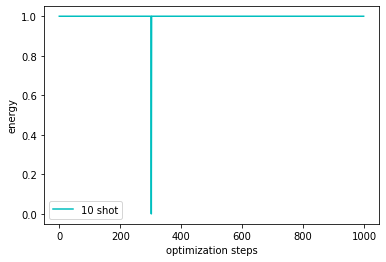

In [129]:
import matplotlib.pyplot as plt
Loss=np.ones(1000)
Loss[302] -= 1

plt.xlabel("optimization steps")
plt.ylabel("energy")
plt.plot(Loss,c="c",label="10 shot")
plt.legend()
plt.show()

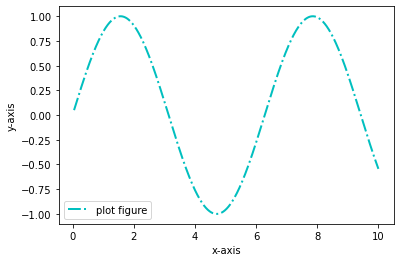

In [127]:
x = np.linspace(0.05, 10, 1000)
y = np.sin(x)

plt.plot(x, y, ls="-.", lw=2, c="c", label="plot figure")

plt.legend()

plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.show()

In [3]:
a=1+3j
a.real
a.imag

3.0

[1. 1. 1. 1. 1.]
[-0.6969899  -0.81261385 -0.72815479 -0.74360952 -0.75874727]


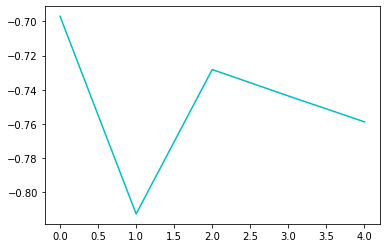

In [18]:
import matplotlib.pyplot as plt
Loss = np.array([-0.6969899,  -0.81261385, -0.72815479, -0.74360952, -0.75874727])
x = np.linspace(1, 1, 5)
print(x)
print(Loss)
# plt.plot(x, Loss, lw=2, c="c", label="plot figure")
plt.plot(Loss,c="c",label="11111 shot")
plt.show()